<h1><center> Ordinary Least Squares

<div class="alert alert-success">
Ordinary least squares (OLS) is a method for estimating linear regression models. It defines the goal of finding the solution that minimizes the sum of squares between the predictions made by the model, and the observed data points. 
</div>

<div class="alert alert-info">
Find more information on OLS on [wiki](https://en.wikipedia.org/wiki/Ordinary_least_squares), check out this cool [interactive tool](http://setosa.io/ev/ordinary-least-squares-regression/) and/or check out this [tutorial](https://www.datarobot.com/blog/ordinary-least-squares-in-python/) about doing OLS in Python.
</div>

In [1]:
# Imports
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

Here, we'll create a minimal dataset, and explore fitting a simple linear model fit to it, using OLS.

In [2]:
# Create some data
# x is an evenly space array of integers
x = np.arange(0, 6)

# y is some data with underlying relationship y = (theta) * x
#  For this example, the true relation of the data is y = 2x
true_rel = 2
y = true_rel * x

# Add some noise to the y dimension
noise = np.random.normal(0, 0.5, len(x))
y = y + noise

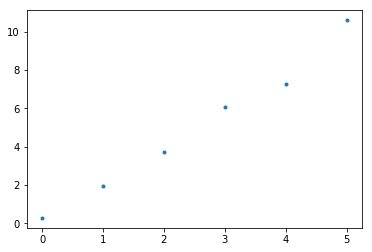

In [3]:
# Plot the data
f = plt.figure()
plt.plot(x, y, '.');

Observing the data above, we can see that there is some relation between the x and y dimension, but we want a way to measure what that relation is. OLS is a procedure to do so: find the model (in this case, line) that minimizes the squared distances between each observed data point and the model prediction. 

In [4]:
# Reshape data to play nice with numpy
x = np.reshape(x, [len(x), 1])
y = np.reshape(y, [len(y), 1])

Numpy provides us with a function to calculuate the OLS solution. In this case, we are fitting the model:

$$y = \theta x $$

Note that we are not fitting an intercept here (no 'b' value, if you think of 'y = ax + b'). In this simple model, we are therefore implicitly assuming an intercept value of zero. You can fit intercepts (and linear models with more parameters) with OLS, you just need to add them in. 

In [5]:
# Fit the (Ordinary) Least Squares best fit line using numpy
#  This gives us a fit value (theta), and residuals (how much error we have in this fit)
theta, residuals, _, _ = np.linalg.lstsq(x, y)

# Pull out theta value from array
theta = theta[0][0]

In [6]:
# Check what the OLS derived solution for theta is:
print(theta)

1.99486861023


In [7]:
# Check how good our OLS solution is
print('The true relationship between y & x is: \t', true_rel)
print('OLS calculated relationship between y & x is: \t', theta)

The true relationship between y & x is: 	 2
OLS calculated relationship between y & x is: 	 1.99486861023


In [8]:
# Check what the residuals are
residuals[0]

1.0543838257087581

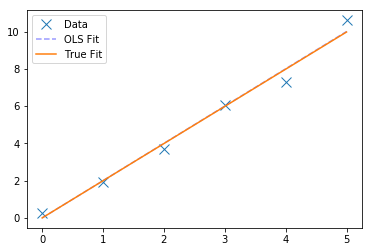

In [9]:
# Plot the raw data, with the true underlying relationship, and the OLS fit
fig, ax = plt.subplots(1)
ax.plot(x, y, 'x', markersize=10, label='Data')
ax.plot(x, 2*x, '--b', alpha=0.4, label='OLS Fit')
ax.plot(x, theta*x, label='True Fit')
ax.legend();

In [10]:
# With our model, we can predict the value of a new 'x' datapoint
new_x = 2.5
pred_y = theta * new_x
print('The prediction for a new x of {} is {:1.3f}'.format(new_x, pred_y))

The prediction for a new x of 2.5 is 4.987


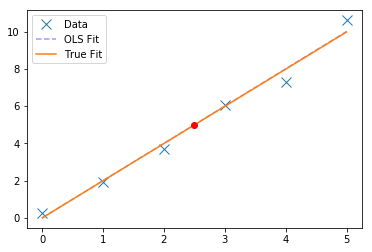

In [11]:
ax.plot(new_x, pred_y, 'or')
fig

In [12]:
# We can also see what the model would predict for all the points we did observe
preds = theta * x

In [13]:
# Residuals are the just the sum of squares between the model fit and the observed data points
# Re-calculate the residuals 'by hand'
error = np.sum(np.subtract(preds, y) ** 2)

In [14]:
# Check that our residuals calculation matches the scipy implementation
print('Error from :', residuals[0])
print('Error from :', error)

Error from : 1.05438382571
Error from : 1.05438382571


<div class="alert alert-success">
Note: In practice, you won't use numpy for OLS. Other modules, like statsmodels, have implementations of OLS more explicitly for linear modelling. </div>

<div class="alert alert-info">
See the 'LinearModels' SectionMaterials notebook and/or [OLS in StatsModels](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).
</div>